# Boston Housing Dataset 

##  Linear regression

Attributes:
- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

First, load the Boston housing dataset from scikit-learn. Create a DataFrame from the feature data as well as the target variable.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
boston = datasets.load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [5]:
df.head()
df['MEDV'] = y

### Linear regression for one parameter

Analyse of the correlation between our target variable (MEDV) and all the other features in the DataFrame. 

In [6]:

corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


# solution: RM has the highest correlation, therefore we would choose this parameter

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Createting a scatter plot between this variable and MEDV to visually analyse the correlation and relationship between these parameters

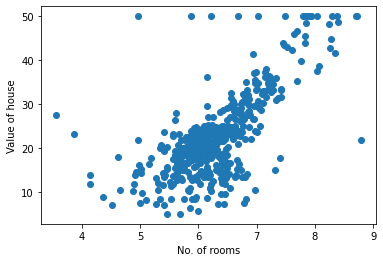

In [7]:
X_rooms = X[:,5]

plt.scatter(X_rooms,y)
plt.xlabel('No. of rooms')
plt.ylabel('Value of house')
plt.show()

Createting a linear regression model to describe the relationship between these parameters and computing the mean absolute error

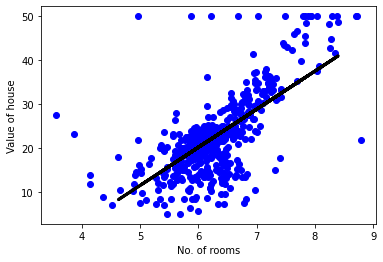

In [9]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

reg = linear_model.LinearRegression(normalize= True)
X_train, X_test, y_train, y_test = train_test_split(X_rooms,y,test_size=0.2, random_state = 21)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)
plt.scatter(X_rooms,y, color='blue')
plt.plot(X_test, pred, color='black', linewidth =3)
plt.xlabel('No. of rooms')
plt.ylabel('Value of house')
plt.show()




In [10]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(pred,y_test))

MAE: 4.533847894769616


## Multivariate linear regression 

I will check if does the accuracy improve in case training a model with all the parameters

In [11]:
reg_all = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 21)
reg_all.fit(X_train, y_train)
pred_all = reg_all.predict(X_test)

print("MAE:", mean_absolute_error(pred_all,y_test))

# yes, the MAE drops.

MAE: 3.6644624256989764
